In [69]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import math
from tqdm import tqdm
from tabulate import tabulate
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
warnings.filterwarnings('ignore')

In [40]:
#read the csv dataset
data = pd.read_csv("heart.csv", encoding='ANSI')
data.info()
data.columns
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [41]:
# checking the dimension of the data set
data.shape

(918, 12)

In [42]:
#checking duplicate values if present in the data
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 12)


In [43]:
# To check whether the data is balanced or not
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

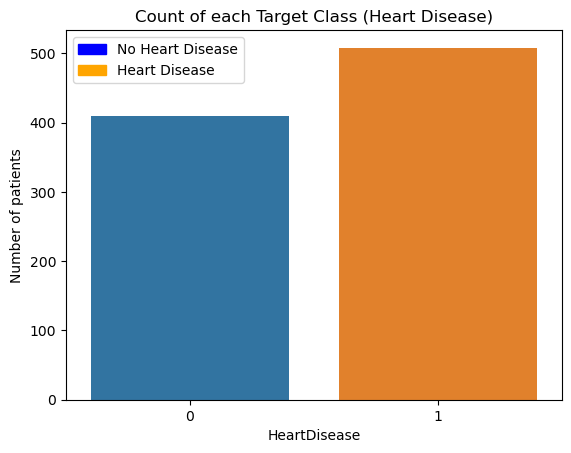

In [44]:
#plotting it to visualize
sns.countplot(x=data["HeartDisease"])
plt.title('Count of each Target Class (Heart Disease)')
plt.ylabel('Number of patients')
colors = {'No Heart Disease':'blue', 'Heart Disease':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

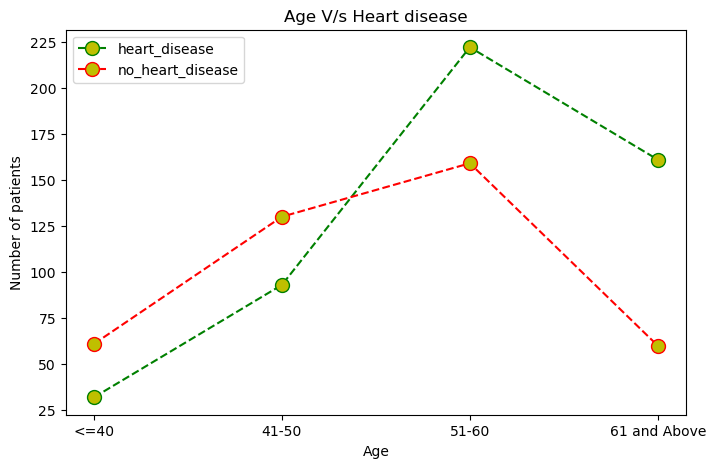

In [45]:
# A line graph for Age V/s heart disease
plt.subplots(figsize =(8,5))
classifiers = ['<=40', '41-50', '51-60','61 and Above'] 
heart_disease = [32, 93, 222, 161]
no_heart_disease = [61, 130, 159, 60]
l1 = plt.plot(classifiers, heart_disease , color='g', marker='o', linestyle ='dashed', markerfacecolor='y', markersize=10)
l2 = plt.plot(classifiers, no_heart_disease, color='r',marker='o', linestyle ='dashed', markerfacecolor='y', markersize=10 )
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age V/s Heart disease')
plt.legend((l1[0], l2[0]), ('heart_disease', 'no_heart_disease'))
plt.show()

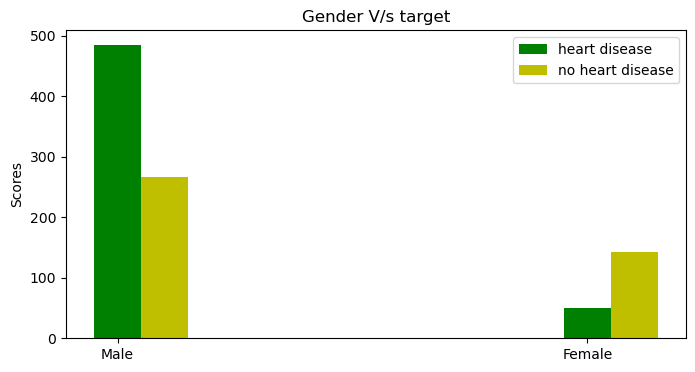

In [22]:
# A bar graph for Gender V/s target
N = 2
ind = np.arange(N)
width = 0.1
fig, ax = plt.subplots(figsize =(8,4))
heart_disease = [485, 50]
rects1 = ax.bar(ind, heart_disease, width, color='g')
no_heart_disease = [267, 143]
rects2 = ax.bar(ind+width, no_heart_disease, width, color='y')
ax.set_ylabel('Scores')
ax.set_title('Gender V/s target')
ax.set_xticks(ind)
ax.set_xticklabels(('Male','Female'))
ax.legend((rects1[0], rects2[0]), ('heart disease', 'no heart disease'))
plt.show()

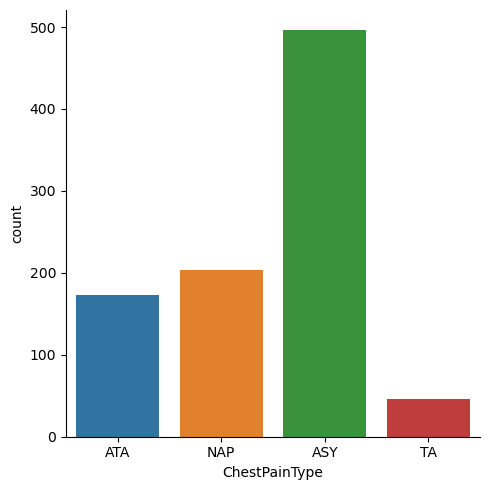

In [8]:
sns.catplot(data, x="ChestPainType", kind="count")

<Axes: xlabel='ChestPainType', ylabel='count'>

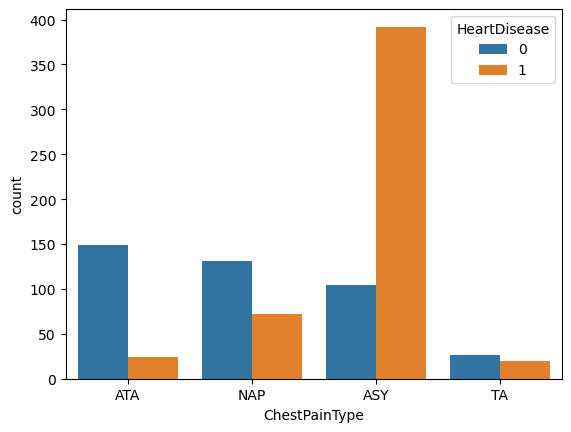

In [10]:
sns.countplot(data, x="ChestPainType", hue="HeartDisease")

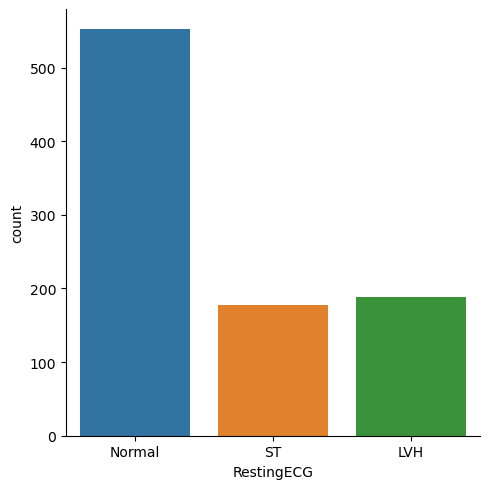

In [11]:
sns.catplot(data, x="RestingECG", kind="count")

<Axes: xlabel='RestingECG', ylabel='count'>

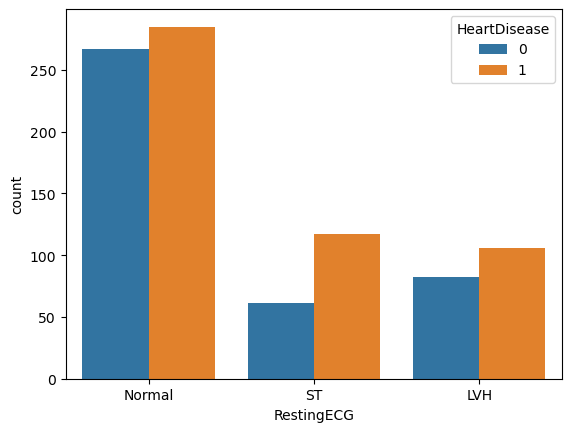

In [12]:
sns.countplot(data, x="RestingECG", hue="HeartDisease")

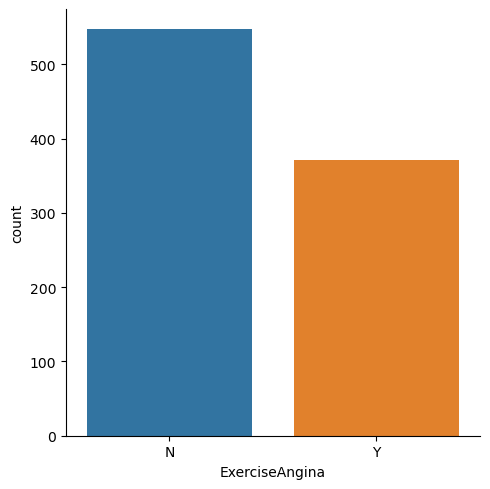

In [13]:
sns.catplot(data, x="ExerciseAngina", kind="count")

<Axes: xlabel='ExerciseAngina', ylabel='count'>

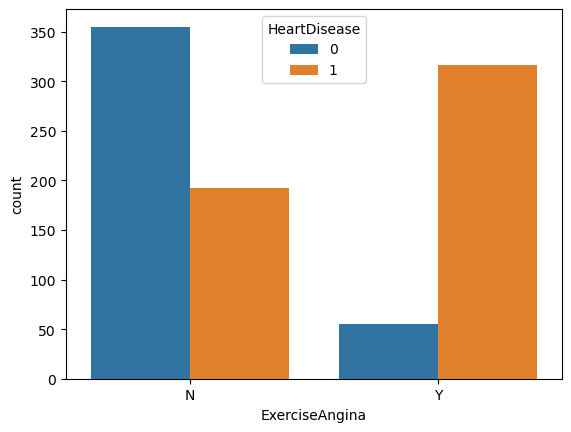

In [14]:
sns.countplot(data, x="ExerciseAngina", hue="HeartDisease")

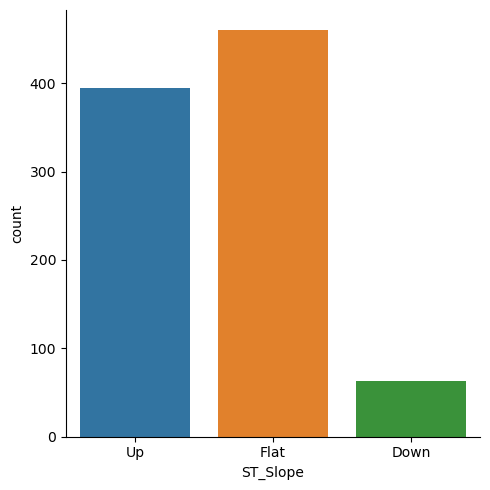

In [15]:
sns.catplot(data, x="ST_Slope", kind="count")

<Axes: xlabel='ST_Slope', ylabel='count'>

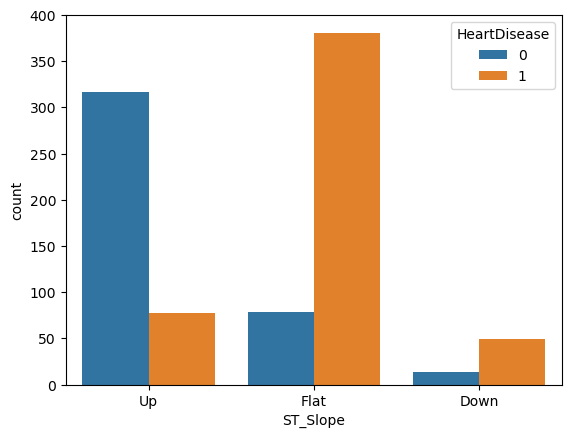

In [16]:
sns.countplot(data, x="ST_Slope", hue="HeartDisease")

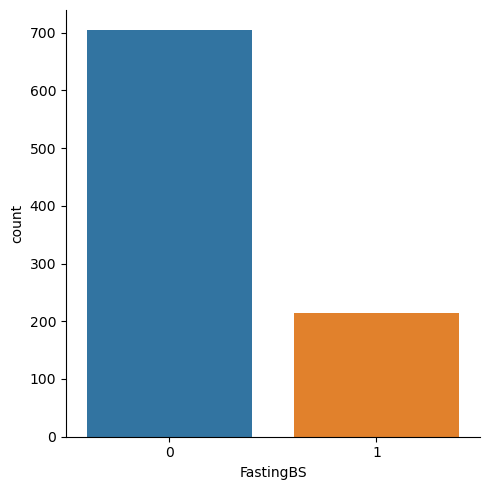

In [17]:
sns.catplot(data, x="FastingBS", kind="count")

<Axes: xlabel='FastingBS', ylabel='count'>

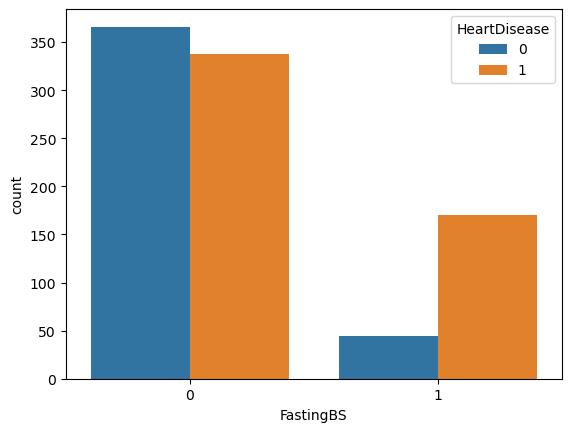

In [18]:
sns.countplot(data, x="FastingBS", hue="HeartDisease")

<Axes: xlabel='Oldpeak', ylabel='Count'>

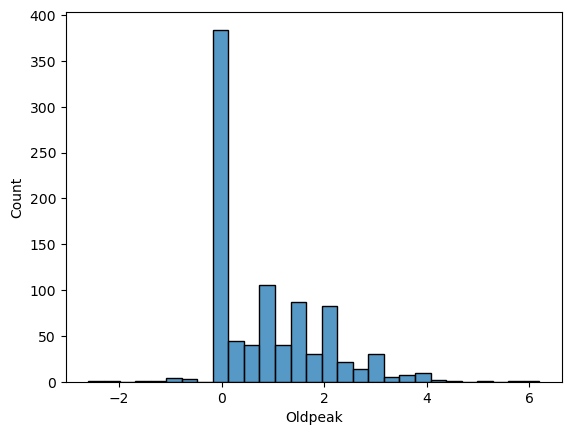

In [23]:
sns.histplot(data, x="Oldpeak")

<Axes: xlabel='RestingBP', ylabel='Count'>

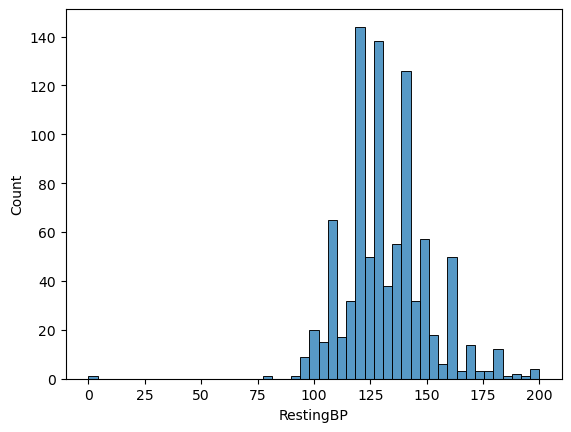

In [24]:
sns.histplot(data, x="RestingBP")

<Axes: xlabel='Cholesterol', ylabel='Count'>

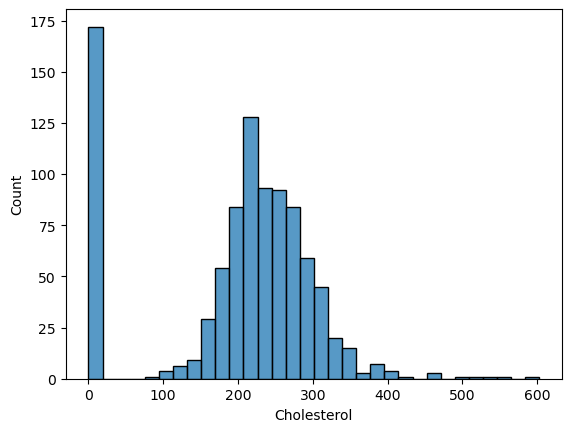

In [25]:
sns.histplot(data, x="Cholesterol")

<Axes: xlabel='MaxHR', ylabel='Count'>

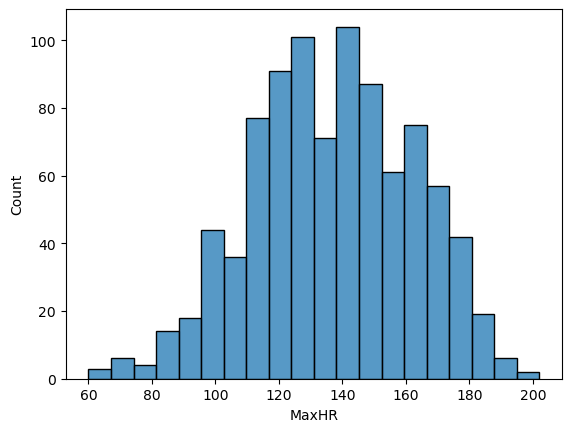

In [26]:
sns.histplot(data, x="MaxHR")

In [46]:
# changing the categorical variable 
le = LabelEncoder()
data_cat =data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']].apply(le.fit_transform)
data_numeric=data.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope'])
data = pd.concat([data_cat,data_numeric],axis=1,ignore_index=False)
data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


                     Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope  \
Sex             1.000000      -0.126559    0.071552        0.190664 -0.150693   
ChestPainType  -0.126559       1.000000   -0.072537       -0.354727  0.213521   
RestingECG      0.071552      -0.072537    1.000000        0.077500 -0.006778   
ExerciseAngina  0.190664      -0.354727    0.077500        1.000000 -0.428706   
ST_Slope       -0.150693       0.213521   -0.006778       -0.428706  1.000000   
Age             0.055750      -0.077150   -0.007484        0.215793 -0.268264   
RestingBP       0.005133      -0.020647    0.022656        0.155101 -0.075162   
Cholesterol    -0.200092       0.067880   -0.196544       -0.034166  0.111471   
FastingBS       0.120076      -0.073151    0.087050        0.060451 -0.175774   
MaxHR          -0.189186       0.289123   -0.179276       -0.370425  0.343419   
Oldpeak         0.105734      -0.177377   -0.020438        0.408752 -0.501921   
HeartDisease    0.305445    

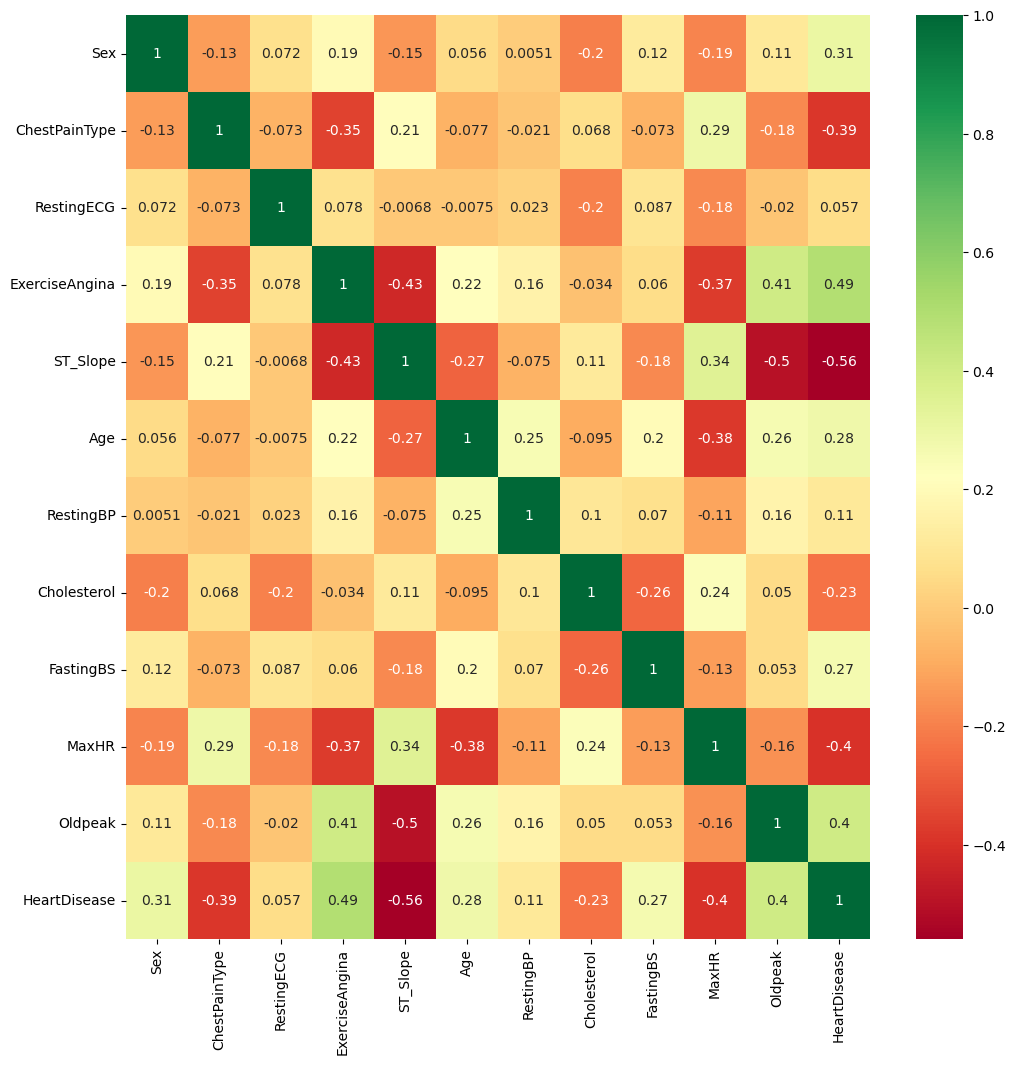

In [47]:
# correlation of each feature in dataset
# plot heat map
corrmat = data.corr()
print(corrmat)
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(12,12))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
# spliting the predictor variable and the explanatory variables
X = data.drop(columns='HeartDisease')
y = data['HeartDisease']
X.shape, y.shape

((918, 11), (918,))

In [56]:
# We split the data into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((734, 11), (734,), (184, 11), (184,))

In [57]:
y_train.value_counts()

1    401
0    333
Name: HeartDisease, dtype: int64

In [58]:
y_test.value_counts()

1    107
0     77
Name: HeartDisease, dtype: int64

In [59]:
# converting the categorical variables into array of the numerical data
from sklearn.preprocessing import OneHotEncoder

cat_cols =['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','FastingBS']
ohc = OneHotEncoder(handle_unknown='ignore')
ohc.fit(np.array(X_train[cat_cols]))
X_train_ohc = ohc.transform(np.array(X_train[cat_cols])).toarray()
X_test_ohc = ohc.transform(np.array(X_test[cat_cols])).toarray()
X_train_ohc.shape, X_test_ohc.shape

((734, 16), (184, 16))

In [60]:
X_train.drop(columns=cat_cols,inplace=True)
X_test.drop(columns=cat_cols,inplace=True)
X_train[['Female','Male','ChestPain_ASY','ChestPain_ATA','ChestPain_NAP','ChestPain_TA','ChestPain_LVH','RestingECG_Normal','RestingECG_ST','ExerciseAngina_No','ExerciseAngina_Yes','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','FastingBS_No','FastingBS_Yes']] = X_train_ohc
X_test[['Female','Male','ChestPain_ASY','ChestPain_ATA','ChestPain_NAP','ChestPain_TA','ChestPain_LVH','RestingECG_Normal','RestingECG_ST','ExerciseAngina_No','ExerciseAngina_Yes','ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up','FastingBS_No','FastingBS_Yes']] = X_test_ohc

In [61]:
# standardizing the numerical data features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
X_train_std = scaler.transform(X_train[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
X_test_std = scaler.transform(X_test[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
X_train_std.shape, X_test_std.shape

((734, 5), (184, 5))

In [62]:
X_train.drop(columns=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'],inplace=True)
X_test.drop(columns=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'],inplace=True)
X_train[['Age_std','RestingBP_std','Cholesterol_std','MaxHR_std','Oldpeak_std']] = X_train_std
X_test[['Age_std','RestingBP_std','Cholesterol_std','MaxHR_std','Oldpeak_std']] = X_test_std
X_train

,Female,Male,ChestPain_ASY,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,ChestPain_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_No,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_No,FastingBS_Yes,Age_std,RestingBP_std,Cholesterol_std,MaxHR_std,Oldpeak_std
795,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-1.245067,-0.708985,0.372803,2.284353,-0.097061
25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,-1.886236,-0.166285,0.086146,1.652241,-0.836286
84,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.250993,0.919115,0.123134,-0.441628,0.087745
10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,-1.779375,-0.166285,0.104640,0.229991,-0.836286
344,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-0.283314,-0.708985,-1.846478,-1.271274,-0.836286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,-0.603898,-0.708985,0.502261,-1.034232,-0.836286
270,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,-0.924483,-0.708985,0.234098,0.150977,-0.836286
860,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.678439,-0.166285,0.493014,0.309005,0.457358
435,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.678439,1.027656,-1.846478,-0.718176,-0.836286


In [63]:
## Base Learners 
clfs = []
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
np.random.seed(1)

In [64]:
#Support Vector Machine(SVM)
pipeline_svm = make_pipeline(SVC(probability=True, kernel="linear", 
class_weight="balanced"))
grid_svm = GridSearchCV(pipeline_svm,
param_grid = {'svc__C': [0.01, 0.1, 1]},
cv = kfolds,
verbose=1,
n_jobs=-1)
grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)
print("\nBest Model: %f using %s" % (grid_svm.best_score_, grid_svm.best_params_))
print('\n')
print('SVM LogLoss {score}'.format(score=log_loss(y_test,grid_svm.predict_proba(X_test))))
clfs.append(grid_svm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Model: 0.859678 using {'svc__C': 0.1}


SVM LogLoss 0.3676008958427481


SVM accuracy score:  0.8532608695652174




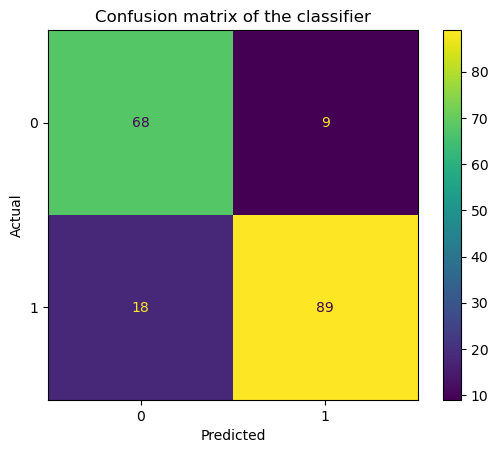



              precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [66]:
# get predictions from the model above
y_preds = grid_svm.predict(X_test)
print('SVM accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
import pylab as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)
cmx = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
print(cmx)
cmx.plot()
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_preds))

In [67]:
# Naive Bayes(NB)
X_tr,X_cv,y_tr,y_cv = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)
X_tr.shape, y_tr.shape, X_cv.shape, y_cv.shape

((587, 21), (587,), (147, 21), (147,))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



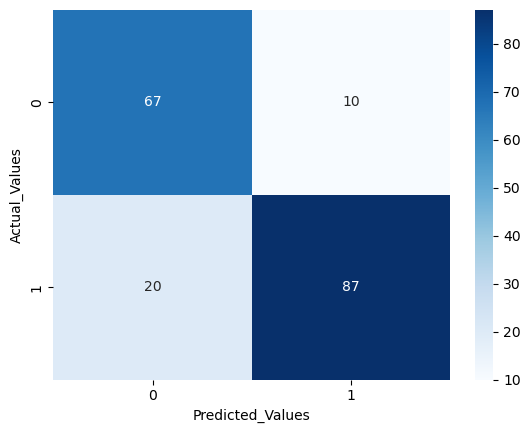

In [70]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

predictions = bnb.predict(X_test)
print(classification_report(y_test,predictions))
ax = sns.heatmap(confusion_matrix(y_test,predictions,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

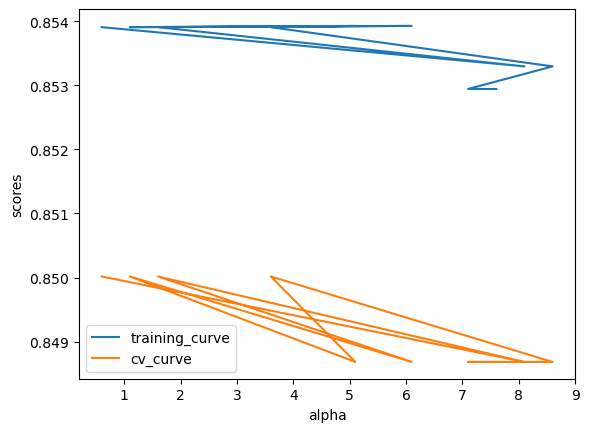

Best hyper parameters: {'alpha': 0.6}
Best score: 0.8500162275817325


In [71]:
#Cross validation
clf = BernoulliNB()
params = {
    'alpha' : [i/10 for i in range(1,100,5)]
}
clf_cv = RandomizedSearchCV(clf,params,scoring='f1_macro',cv=5,return_train_score=True)
clf_cv.fit(X_train,y_train)

train_score = clf_cv.cv_results_['mean_train_score']
test_score = clf_cv.cv_results_['mean_test_score']
n_neigh = clf_cv.cv_results_['param_alpha']

plt.plot(n_neigh,train_score,label='training_curve')
plt.plot(n_neigh,test_score,label='cv_curve')
plt.xlabel('alpha')
plt.ylabel('scores')
plt.legend()
plt.show()

print("Best hyper parameters: {}".format(clf_cv.best_params_))
print("Best score: {}".format(clf_cv.best_score_))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        67
           1       0.83      0.89      0.86        80

    accuracy                           0.84       147
   macro avg       0.84      0.83      0.83       147
weighted avg       0.84      0.84      0.84       147



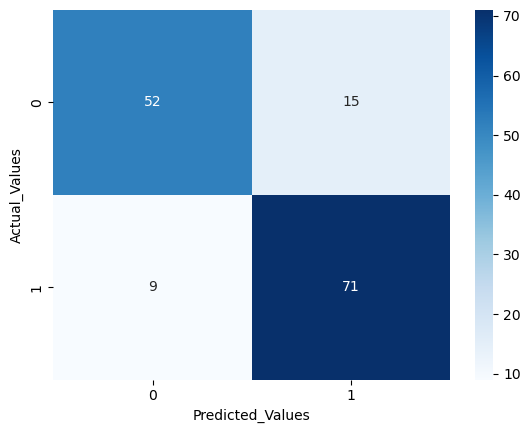

In [72]:
#Training the model with best hyper parameters
bnb_clf = BernoulliNB(alpha=0.6)
bnb_clf.fit(X_tr,y_tr)

y_predicted = bnb_clf.predict(X_cv)
print(classification_report(y_cv,y_predicted))
ax = sns.heatmap(confusion_matrix(y_cv,y_predicted,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        77
           1       0.89      0.81      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



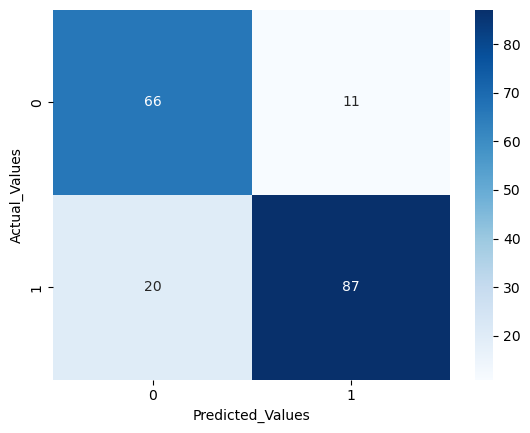

In [73]:
#Checking the results on new unseen test data points by the model

y_predicted = bnb_clf.predict(X_test)
print(classification_report(y_test,y_predicted))
ax = sns.heatmap(confusion_matrix(y_test,y_predicted,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

In [74]:
# Logistic Regression(LR) 
lr = LogisticRegression()
clf = lr.fit(X_train,y_train)
predictions = clf.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



[Text(50.722222222222214, 0.5, 'Actual Values'),
 Text(0.5, 23.52222222222222, 'Predicted Values')]

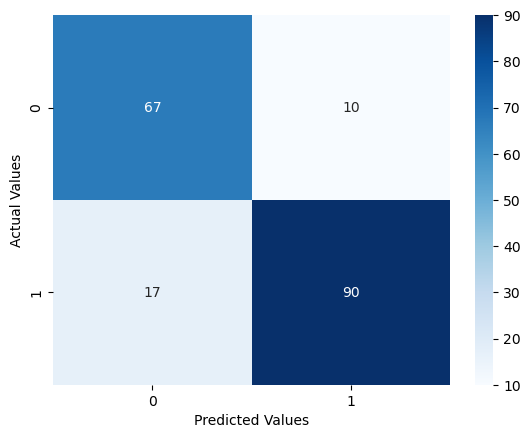

In [75]:
#Classification Results
print(classification_report(y_test,predictions))
ax = sns.heatmap(confusion_matrix(y_test,predictions,labels=[0,1]),cmap='Blues',annot=True,xticklabels=[0,1],yticklabels=[0,1])
ax.set(ylabel="Actual Values", xlabel="Predicted Values")

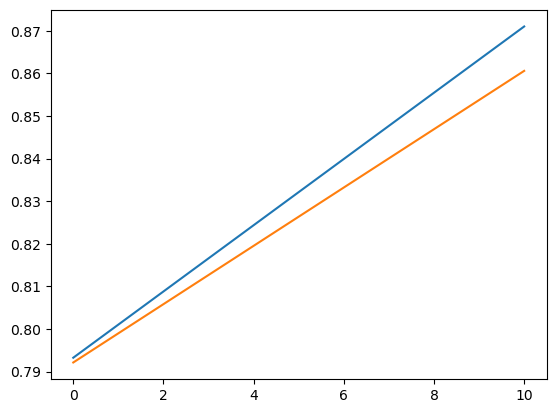

Best parameter values: {'solver': 'newton-cholesky', 'penalty': 'l2', 'class_weight': None, 'C': 0.1}
Best f1-score: 0.8618064755534167


In [77]:
#Cross Validation using RadomizedsearchCV
lr_cv = LogisticRegression(random_state=42)
params = {
    'C': [0.001,0.01,0.1,1,10],
    'penalty': ['l1','l2','elasticnet',None],
    'class_weight': ['balanced', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],

}
clf_cv = RandomizedSearchCV(lr_cv,params,scoring='f1_macro',cv=5,return_train_score=True)
clf_cv.fit(X_train,y_train)
train_scores = clf_cv.cv_results_['mean_train_score']
cv_scores = clf_cv.cv_results_['mean_test_score']
param_C = clf_cv.cv_results_['param_C']
plt.plot(param_C,train_scores)
plt.plot(param_C,cv_scores)
plt.show()
print("Best parameter values: {}".format(clf_cv.best_params_))
print("Best f1-score: {}".format(clf_cv.best_score_))

In [79]:
lr_best = LogisticRegression(random_state=42,solver='newton-cholesky',penalty='l2',class_weight=None,C=0.1)
lr_best.fit(X_train,y_train)

predictions = lr_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



[Text(50.722222222222214, 0.5, 'Actual Values'),
 Text(0.5, 23.52222222222222, 'Predicted Values')]

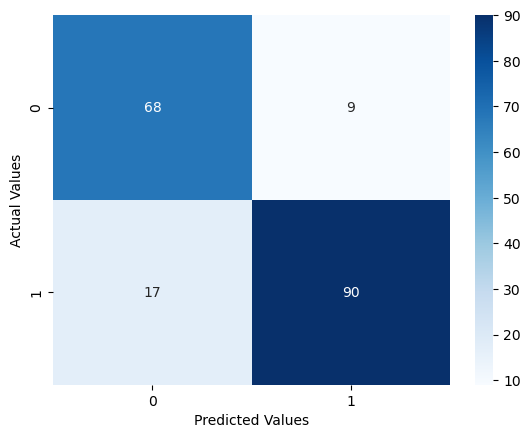

In [80]:
print(classification_report(y_test,predictions))

ax = sns.heatmap(confusion_matrix(y_test,predictions,labels=[0,1]),cmap='Blues',annot=True,xticklabels=[0,1],yticklabels=[0,1])
ax.set(ylabel="Actual Values", xlabel="Predicted Values")

In [81]:
feature_data = pd.DataFrame()
feature_data['features'] = X_train.columns
feature_data['weights'] = lr_best.coef_[0]
feature_data

,features,weights
0,Female,-0.442545
1,Male,0.442545
2,ChestPain_ASY,0.740377
3,ChestPain_ATA,-0.365334
4,ChestPain_NAP,-0.330367
5,ChestPain_TA,-0.044676
6,ChestPain_LVH,0.120987
7,RestingECG_Normal,-0.011373
8,RestingECG_ST,-0.109614
9,ExerciseAngina_No,-0.480201


In [82]:
# Decision Tree(DT)
classifierDT=DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3, min_samples_leaf=5)
classifierDT.fit(X_train,y_train)
classifierDT.score(X_test, y_test)
print('Decision Tree LogLoss {score}'.format(score=log_loss(y_test, 
classifierDT.predict_proba(X_test))))
clfs.append(classifierDT)


Decision Tree LogLoss 0.3643099148715398


Decision Tree accuracy score:  0.8478260869565217




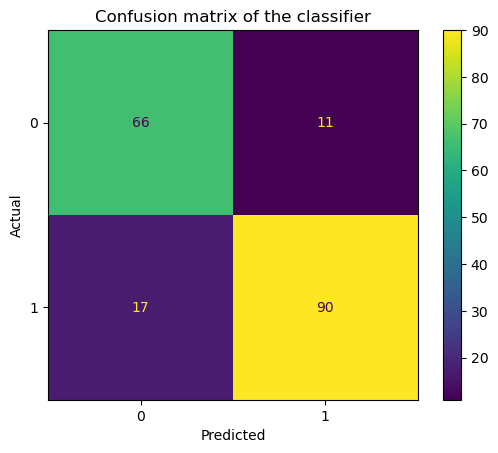



              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [84]:
# get predictions from the model above
y_preds = classifierDT.predict(X_test)
print('Decision Tree accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
import pylab as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)
cmx = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
print(cmx)
cmx.plot()
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_preds))

In [85]:
# Random Forest(RF) 
classifierRF=RandomForestClassifier() 
classifierRF.fit(X_train,y_train) 
classifierRF.score(X_test, y_test)
print('RandomForestLogLoss {score}'.format(score=log_loss(y_test, 
classifierRF.predict_proba(X_test))))
clfs.append(classifierRF)

RandomForestLogLoss 0.49871737405962496


Random Forest accuracy score:  0.8804347826086957




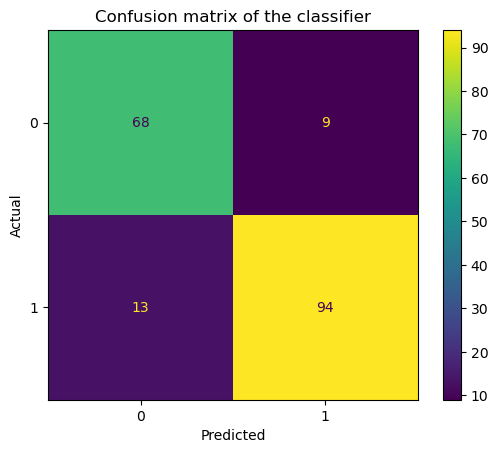



              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [86]:
# get predictions from the model above
y_preds = classifierRF.predict(X_test)
print('Random Forest accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
import pylab as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)
cmx = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
print(cmx)
cmx.plot()
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_preds))

In [87]:
print('Accuracy of svm: {}'.format(grid_svm.score(X_test, y_test)))
print('Accuracy of naive bayes: {}'.format(bnb_clf.score(X_test, y_test)))
print('Accuracy of logistic regression: {}'.format(lr_best.score(X_test, y_test)))
print('Accuracy of decision tree: {}'.format(classifierDT.score(X_test, y_test))) 
print('Accuracy of random forest: {}'.format(classifierRF.score(X_test, y_test)))

Accuracy of svm: 0.8532608695652174
Accuracy of naive bayes: 0.8315217391304348
Accuracy of logistic regression: 0.8586956521739131
Accuracy of decision tree: 0.8478260869565217
Accuracy of random forest: 0.8804347826086957
